In [1]:
import pandas as pd
import numpy as np

# 랜덤 시드 설정 (결과 재현 가능)
np.random.seed(42)

# 가상 데이터 생성
num_customers = 200  # 고객 수
data = {
    "Customer_ID": range(1, num_customers + 1),
    "Skin_Type": np.random.choice(["Dry", "Oily", "Combination", "Sensitive"], num_customers),
    "Purchase_Frequency": np.random.randint(1, 20, num_customers),  # 연간 구매 빈도
    "Average_Spend": np.random.uniform(20, 500, num_customers),  # 평균 구매 금액 ($)
    "Season_Preference": np.random.choice(["Summer", "Winter", "All-Year"], num_customers),
}

# 데이터프레임 생성
customer_data = pd.DataFrame(data)

# 데이터 확인
print(customer_data.head())


   Customer_ID    Skin_Type  Purchase_Frequency  Average_Spend  \
0            1  Combination                   7      37.927131   
1            2    Sensitive                  17     414.848269   
2            3          Dry                   4     192.891508   
3            4  Combination                   5      80.989046   
4            5  Combination                   7     270.676765   

  Season_Preference  
0            Summer  
1            Winter  
2            Winter  
3            Winter  
4            Winter  


[[ 1.1585219  -0.09787683]
 [-0.58426783  0.87571654]
 [-0.67447335 -1.0013321 ]]


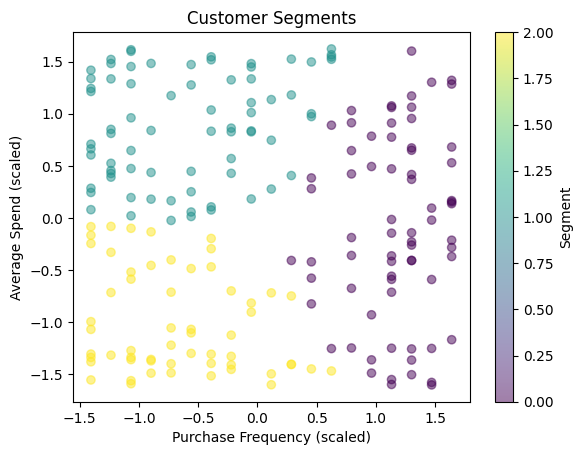

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 수치형 데이터만 사용
numeric_features = customer_data[["Purchase_Frequency", "Average_Spend"]]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Segment"] = kmeans.fit_predict(scaled_features)

# 클러스터 중심 확인
print(kmeans.cluster_centers_)

# 시각화
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_data["Segment"], cmap="viridis", alpha=0.5)
plt.title("Customer Segments")
plt.xlabel("Purchase Frequency (scaled)")
plt.ylabel("Average Spend (scaled)")
plt.colorbar(label="Segment")
plt.show()


         Purchase_Frequency  Average_Spend
Segment                                   
0                 16.157143     245.094643
1                  5.849315     387.589779
2                  5.315789     112.864920


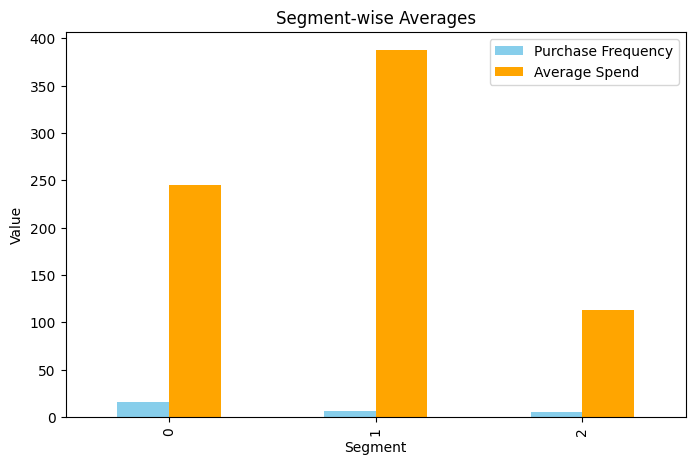

In [3]:
# 클러스터별 평균
segment_summary = customer_data.groupby("Segment")[["Purchase_Frequency", "Average_Spend"]].mean()
print(segment_summary)

# 막대그래프 시각화
segment_summary.plot(kind="bar", figsize=(8, 5), color=["skyblue", "orange"])
plt.title("Segment-wise Averages")
plt.ylabel("Value")
plt.xlabel("Segment")
plt.legend(["Purchase Frequency", "Average Spend"])
plt.show()
